## install the streaming twitter jar in the notebook from the Github repo

In [1]:
#!pip install --upgrade 'pixiedust==1.0.4'
!pip install --user --no-deps --upgrade pixiedust

    100% |████████████████████████████████| 133kB 3.3MB/s ta 0:00:01
  Running setup.py bdist_wheel for pixiedust ... done
  Stored in directory: /gpfs/fs01/user/s265-f34487ae102c10-536547fd2c66/.cache/pip/wheels/27/ad/40/25418dfd6c7101fd7d3f25569ef80838e018f0ac378f7257ea
Successfully built pixiedust
  Found existing installation: pixiedust 1.0.9
    Uninstalling pixiedust-1.0.9:
      Successfully uninstalled pixiedust-1.0.9


In [2]:
import pixiedust
jarPath = "https://github.com/ibm-watson-data-lab/spark.samples/raw/master/dist/streaming-twitter-assembly-1.6.jar"
pixiedust.installPackage(jarPath)

Pixiedust database opened successfully


Package already installed: https://github.com/ibm-watson-data-lab/spark.samples/raw/master/dist/streaming-twitter-assembly-1.6.jar


## Use Scala Bridge to run the command line version of the app
For instruction on how to set up the twitter and Tone Analyzer credentials, please refer to https://developer.ibm.com/clouddataservices/2016/01/15/real-time-sentiment-analysis-of-twitter-hashtags-with-spark/ 

In [3]:
twitterConsumerKey = "rcV8J7Um8rRUWZjgQaNbHCwpB"
twitterConsumerSecret = "lOGBxQqpltsuRIkqHRr72flWWD8bQDvLPkvcpkLYIpvJorRI7L"
twitterAccessToken = "19284317-XLh5zxj42rvwp2rX6N07vMns1qBEMwzxU9XC4PeWh"
twitterAccessTokenSecret = "UNL28CxJWmW6MgsXaBa0o5jgkYWEc4iSIpfuiQrzEH2fm"
toneAnalyzerPassword = "ggnuQSR3t2mD"
toneAnalyzerUserName = "0700a223-dcc2-4ff9-8b4f-d49f655daa52"

In [4]:
%%scala
val demo = com.ibm.cds.spark.samples.StreamingTwitter
demo.setConfig("twitter4j.oauth.consumerKey",twitterConsumerKey)
demo.setConfig("twitter4j.oauth.consumerSecret",twitterConsumerSecret)
demo.setConfig("twitter4j.oauth.accessToken",twitterAccessToken)
demo.setConfig("twitter4j.oauth.accessTokenSecret",twitterAccessTokenSecret)
demo.setConfig("watson.tone.url","https://gateway.watsonplatform.net/tone-analyzer/api")
demo.setConfig("watson.tone.password",toneAnalyzerPassword)
demo.setConfig("watson.tone.username",toneAnalyzerUserName)

import org.apache.spark.streaming._
demo.startTwitterStreaming(sc, Seconds(30))

Starting twitter stream
Twitter stream started
Tweets are collected real-time and analyzed
To stop the streaming and start interacting with the data use: StreamingTwitter.stopTwitterStreaming


In [6]:
%%scala
val demo = com.ibm.cds.spark.samples.StreamingTwitter
val (__sqlContext, __df) = demo.createTwitterDataFrames(sc)

A new table named tweets with 125 records has been correctly created and can be accessed through the SQLContext variable
Here's the schema for tweets
root
 |-- author: string (nullable = true)
 |-- userid: string (nullable = true)
 |-- date: string (nullable = true)
 |-- lang: string (nullable = true)
 |-- text: string (nullable = true)
 |-- lat: double (nullable = true)
 |-- long: double (nullable = true)
 |-- Anger: double (nullable = true)
 |-- Disgust: double (nullable = true)
 |-- Fear: double (nullable = true)
 |-- Joy: double (nullable = true)
 |-- Sadness: double (nullable = true)
 |-- Analytical: double (nullable = true)
 |-- Confident: double (nullable = true)
 |-- Tentative: double (nullable = true)
 |-- Openness: double (nullable = true)
 |-- Conscientiousness: double (nullable = true)
 |-- Extraversion: double (nullable = true)
 |-- Agreeableness: double (nullable = true)
 |-- EmotionalRange: double (nullable = true)



## Do some data science with the DataFrame __df obtained from the scala code above

In [7]:
tweets=__df
tweets.count()
display(tweets)

author,userid,date,lang,text,lat,long,Anger,Disgust,Fear,Joy,Sadness,Analytical,Confident,Tentative,Openness,Conscientiousness,Extraversion,Agreeableness,EmotionalRange
Brian Murdock,kostaki,Wed Aug 30 11:53:04 CDT 2017,en,"RT @DavidUberti: One of my all-time favorite pull-quotes, courtesy @outline: https://t.co/l5Ph99ImwS",0.0,0.0,5.0,5.0,6.0,70.0,17.0,0.0,0.0,0.0,83.0,94.0,77.0,92.0,0.0
(エリュシア・デ・ルート・イーマ,AnR_Elsie,Wed Aug 30 11:53:04 CDT 2017,en,I am 300+ years old,0.0,0.0,12.0,36.0,7.0,10.0,51.0,0.0,0.0,0.0,1.0,19.0,34.0,54.0,0.0
JJ,JJoyceeeexo,Wed Aug 30 11:53:04 CDT 2017,en,"RT @jaidaleexx: I've had enough of petty dudes, I've had enough of shitty news",0.0,0.0,54.0,46.0,3.0,3.0,27.0,0.0,0.0,0.0,25.0,1.0,11.0,32.0,0.0
Prem Ranjan,premranjan00091,Wed Aug 30 11:53:04 CDT 2017,en,RT @rajhav_kumar: Taylor Swift Broke Up With Calvin Harris For THIS Shocking Reason https://t.co/1Mw3AcIOXg,0.0,0.0,13.0,64.0,6.0,5.0,37.0,0.0,0.0,0.0,7.0,4.0,76.0,64.0,0.0
radar_kameradin,radar_kameradin,Wed Aug 30 11:53:04 CDT 2017,en,RT @TheArabSource: Breaking: #US strike 'blocks' #ISIL buses from reaching Deir Ezzor https://t.co/yxDlxJRRxe #DeirEzzor #Syria,0.0,0.0,17.0,41.0,19.0,2.0,54.0,0.0,0.0,0.0,5.0,21.0,9.0,53.0,0.0
AB Newswire,ABNewswire,Wed Aug 30 11:53:04 CDT 2017,en,"Global Refurbished Medical Imaging Equipment Market 2017 Share,Trend,Segmentation and Forecast to 2021 https://t.co/RAMoK9lEq4",0.0,0.0,2.0,12.0,3.0,32.0,14.0,83.0,0.0,0.0,38.0,25.0,45.0,53.0,0.0
deneille,bLueLhipZtiq,Wed Aug 30 11:53:04 CDT 2017,en,RT @MDJredux: RT this in a million times wooooooh #PushAwardsRaStroRebels https://t.co/XamHcukzRT,0.0,0.0,8.0,26.0,12.0,46.0,20.0,0.0,0.0,0.0,2.0,48.0,23.0,80.0,0.0
jhene,Desi_sal,Wed Aug 30 11:53:04 CDT 2017,en,chillin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,27.0,54.0,60.0,0.0
majora's masc,jocqua,Wed Aug 30 11:53:04 CDT 2017,en,RT @Jo_C12: Me every time @KALIUCHIS new song comes on https://t.co/QDnMKZnlKf,0.0,0.0,6.0,6.0,8.0,70.0,13.0,0.0,85.0,0.0,2.0,47.0,43.0,68.0,0.0
Tommie Bedgood,BeGoodTom,Wed Aug 30 11:53:04 CDT 2017,en,( ^?^) :-> https://t.co/Vfi25VJWjG,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
#create an array that will hold the count for each sentiment
sentimentDistribution=[0] * 13
#For each sentiment, run a sql query that counts the number of tweets for which the sentiment score is greater than 60%
#Store the data in the array
for i, sentiment in enumerate(tweets.columns[-13:]):
    sentimentDistribution[i]=__sqlContext.sql("SELECT count(*) as sentCount FROM tweets where " + sentiment + " > 60")\
        .collect()[0].sentCount

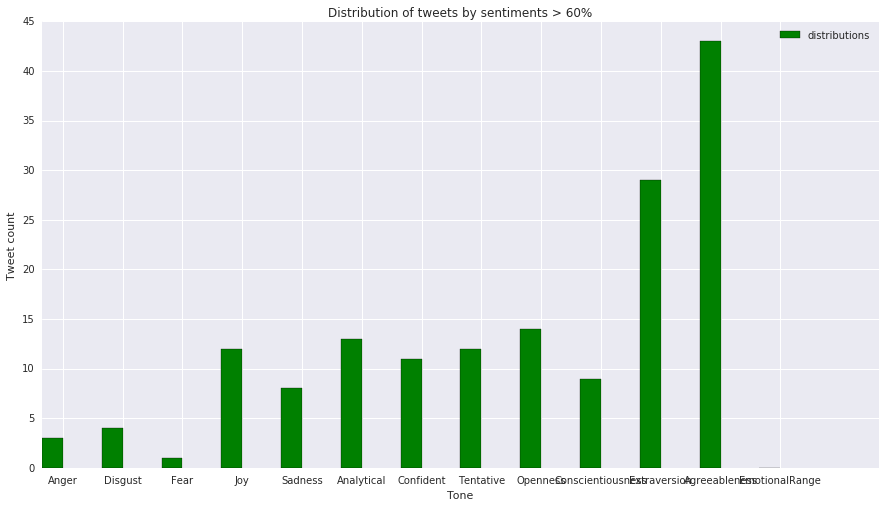

In [9]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

ind=np.arange(13)
width = 0.35
bar = plt.bar(ind, sentimentDistribution, width, color='g', label = "distributions")

params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0]*2.5, plSize[1]*2) )
plt.ylabel('Tweet count')
plt.xlabel('Tone')
plt.title('Distribution of tweets by sentiments > 60%')
plt.xticks(ind+width, tweets.columns[-13:])
plt.legend()

plt.show()

## Use Twitter demo embedded app to run the same app with a UI

In [10]:
%%scala
val demo = com.ibm.cds.spark.samples.PixiedustStreamingTwitter
demo.setConfig("twitter4j.oauth.consumerKey",twitterConsumerKey)
demo.setConfig("twitter4j.oauth.consumerSecret",twitterConsumerSecret)
demo.setConfig("twitter4j.oauth.accessToken",twitterAccessToken)
demo.setConfig("twitter4j.oauth.accessTokenSecret",twitterAccessTokenSecret)
demo.setConfig("watson.tone.url","https://gateway.watsonplatform.net/tone-analyzer/api")
demo.setConfig("watson.tone.password",toneAnalyzerPassword)
demo.setConfig("watson.tone.username",toneAnalyzerUserName)
demo.setConfig("checkpointDir", System.getProperty("user.home") + "/pixiedust/ssc")

In [11]:
!pip install --user pixiedust_twitterdemo

In [13]:
from pixiedust_twitterdemo import *
twitterDemo()